In [26]:
from monty.serialization import loadfn, dumpfn
from pymatgen import Structure, Composition, Element
from pymatgen.entries.computed_entries import ComputedEntry, ComputedStructureEntry
from pymatgen.analysis.structure_matcher import StructureMatcher, ElementComparator
from pymatgen.entries.entry_tools import EntrySet
from pymatgen.util.plotting import periodic_table_heatmap
from itertools import groupby
from re import sub
import pandas as pd

In [2]:
scan_entries = loadfn('element_scan_entries_2020-04-09.json')
gga_entries = loadfn('element_gga_entries_2020-03-10.json')

def sort_by_element(entries_list):
    elem_dict = dict()
    for entry in entries_list:
        element = sub(r'[0-9]', '', entry.structure.composition.reduced_formula)
        if not element in elem_dict.keys():
            elem_dict[element] = list([entry])
        else:
            elem_dict[element].append(entry)
    return elem_dict

#Dictionaries where keys are elements and values are lists of entries associated with each element
scan_sorted, gga_sorted = sort_by_element(scan_entries), sort_by_element(gga_entries)

#What elements are missing from scan?
missing_from_scan = list()
for elem in gga_sorted.keys():
    if elem not in scan_sorted.keys():
        missing_from_scan.append(elem)

/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:423: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn("No electronegativity for %s. Setting to NaN. "
/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:423: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn("No electronegativity for %s. Setting to NaN. "
/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:423: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn("No electronegativity for %s. Setting to NaN. "


In [3]:
def get_ground_state(entries_dict):
    gs_dict = dict()
    for element in entries_dict.keys():
        entry_set = EntrySet(entries_dict[element])
        entry_set.remove_non_ground_states()
        gs_dict[element] = list(entry_set)[0]
    return gs_dict

#Key: element, Value: entry corresponding to ground state structure
scan_gs_dict, gga_gs_dict = get_ground_state(scan_sorted), get_ground_state(gga_sorted)

In [31]:
element_list = list(scan_gs_dict.keys())
scan_entries = [scan_gs_dict[elem] for elem in element_list]
gga_entries = [gga_gs_dict[elem] for elem in element_list]
full_scan_list = [scan_sorted[elem] for elem in element_list]
full_gga_list = [gga_sorted[elem] for elem in element_list]

element_data = pd.DataFrame({'element':element_list, 'SCAN_gs':scan_entries, 'GGA_gs':gga_entries, 'SCAN_entries':full_scan_list, 'GGA_entries':full_gga_list})
element_data

,element,SCAN_gs,GGA_gs,SCAN_entries,GGA_entries
0,Ac,ComputedStructureEntry 2758 - Ac3\nEnergy = -2...,ComputedStructureEntry mp-1183069 - Ac3\nEnerg...,[ComputedStructureEntry 2758 - Ac3\nEnergy = -...,[ComputedStructureEntry mp-10018 - Ac1\nEnergy...
1,Ag,ComputedStructureEntry 6558 - Ag1\nEnergy = -3...,ComputedStructureEntry mp-124 - Ag1\nEnergy = ...,[ComputedStructureEntry 6558 - Ag1\nEnergy = -...,[ComputedStructureEntry mp-10597 - Ag2\nEnergy...
2,Al,ComputedStructureEntry 6676 - Al4\nEnergy = -3...,ComputedStructureEntry mp-134 - Al1\nEnergy = ...,[ComputedStructureEntry 6676 - Al4\nEnergy = -...,[ComputedStructureEntry mp-1183144 - Al4\nEner...
3,Ar,ComputedStructureEntry 4460 - Ar2\nEnergy = -1...,ComputedStructureEntry mp-23155 - Ar1\nEnergy ...,[ComputedStructureEntry 4460 - Ar2\nEnergy = -...,[ComputedStructureEntry mp-23155 - Ar1\nEnergy...
4,As,ComputedStructureEntry 4901 - As4\nEnergy = -8...,ComputedStructureEntry mp-11 - As2\nEnergy = -...,[ComputedStructureEntry 4901 - As4\nEnergy = -...,[ComputedStructureEntry mp-10 - As2\nEnergy = ...
...,...,...,...,...,...
83,Xe,ComputedStructureEntry 6784 - Xe4\nEnergy = -1...,ComputedStructureEntry mp-972256 - Xe1\nEnergy...,[ComputedStructureEntry 6784 - Xe4\nEnergy = -...,[ComputedStructureEntry mp-1187761 - Xe4\nEner...
84,Y,ComputedStructureEntry 2640 - Y2\nEnergy = -55...,ComputedStructureEntry mp-112 - Y2\nEnergy = -...,[ComputedStructureEntry 2640 - Y2\nEnergy = -5...,[ComputedStructureEntry mp-112 - Y2\nEnergy = ...
85,Yb,ComputedStructureEntry 6593 - Yb1\nEnergy = -5...,ComputedStructureEntry mp-162 - Yb1\nEnergy = ...,[ComputedStructureEntry 6593 - Yb1\nEnergy = -...,[ComputedStructureEntry mp-1187875 - Yb4\nEner...
86,Zn,ComputedStructureEntry 4056 - Zn2\nEnergy = -2...,ComputedStructureEntry mp-79 - Zn2\nEnergy = -...,[ComputedStructureEntry 4056 - Zn2\nEnergy = -...,[ComputedStructureEntry mp-1187812 - Zn3\nEner...


In [35]:
matcher = StructureMatcher(primitive_cell=True, 
                           scale=True, 
                           attempt_supercell=False, 
                           allow_subset=False, 
                           comparator=ElementComparator())

# #Key: element, Value: tuple with SCAN & GGA entries of elements with different ground states for SCAN & GGA
# def get_diff_dict(scan_gs_dict, gga_gs_dict):
#     diff_dict = dict()
#     for element in scan_gs_dict.keys():
#         scan_struct, gga_struct = scan_gs_dict[element].structure, gga_gs_dict[element].structure
#         if not matcher.fit(scan_struct, gga_struct):
#             diff_dict[element] = (scan_gs_dict[element], gga_gs_dict[element])
#     return diff_dict

# diff_dict = get_diff_dict(scan_gs_dict, gga_gs_dict)
# print(set(diff_dict.keys()))
match_list = []
for i in range(len(element_data)):
    if matcher.fit(element_data.iloc[i, 1].structure, element_data.iloc[i, 2].structure):
        match_list.append(True)
    else:
        match_list.append(False)
element_data['matching_gs'] = match_list
element_data

,element,SCAN_gs,GGA_gs,SCAN_entries,GGA_entries,matching_gs
0,Ac,ComputedStructureEntry 2758 - Ac3\nEnergy = -2...,ComputedStructureEntry mp-1183069 - Ac3\nEnerg...,[ComputedStructureEntry 2758 - Ac3\nEnergy = -...,[ComputedStructureEntry mp-10018 - Ac1\nEnergy...,True
1,Ag,ComputedStructureEntry 6558 - Ag1\nEnergy = -3...,ComputedStructureEntry mp-124 - Ag1\nEnergy = ...,[ComputedStructureEntry 6558 - Ag1\nEnergy = -...,[ComputedStructureEntry mp-10597 - Ag2\nEnergy...,True
2,Al,ComputedStructureEntry 6676 - Al4\nEnergy = -3...,ComputedStructureEntry mp-134 - Al1\nEnergy = ...,[ComputedStructureEntry 6676 - Al4\nEnergy = -...,[ComputedStructureEntry mp-1183144 - Al4\nEner...,False
3,Ar,ComputedStructureEntry 4460 - Ar2\nEnergy = -1...,ComputedStructureEntry mp-23155 - Ar1\nEnergy ...,[ComputedStructureEntry 4460 - Ar2\nEnergy = -...,[ComputedStructureEntry mp-23155 - Ar1\nEnergy...,False
4,As,ComputedStructureEntry 4901 - As4\nEnergy = -8...,ComputedStructureEntry mp-11 - As2\nEnergy = -...,[ComputedStructureEntry 4901 - As4\nEnergy = -...,[ComputedStructureEntry mp-10 - As2\nEnergy = ...,False
...,...,...,...,...,...,...
83,Xe,ComputedStructureEntry 6784 - Xe4\nEnergy = -1...,ComputedStructureEntry mp-972256 - Xe1\nEnergy...,[ComputedStructureEntry 6784 - Xe4\nEnergy = -...,[ComputedStructureEntry mp-1187761 - Xe4\nEner...,False
84,Y,ComputedStructureEntry 2640 - Y2\nEnergy = -55...,ComputedStructureEntry mp-112 - Y2\nEnergy = -...,[ComputedStructureEntry 2640 - Y2\nEnergy = -5...,[ComputedStructureEntry mp-112 - Y2\nEnergy = ...,True
85,Yb,ComputedStructureEntry 6593 - Yb1\nEnergy = -5...,ComputedStructureEntry mp-162 - Yb1\nEnergy = ...,[ComputedStructureEntry 6593 - Yb1\nEnergy = -...,[ComputedStructureEntry mp-1187875 - Yb4\nEner...,False
86,Zn,ComputedStructureEntry 4056 - Zn2\nEnergy = -2...,ComputedStructureEntry mp-79 - Zn2\nEnergy = -...,[ComputedStructureEntry 4056 - Zn2\nEnergy = -...,[ComputedStructureEntry mp-1187812 - Zn3\nEner...,True


In [36]:
# #Key: element, value: difference in energy_per_atom of SCAN and GGA ground state structures
# energy_dict = dict()
# for elem in scan_gs_dict.keys():
#     energy_dict[elem] = scan_gs_dict[elem].energy_per_atom - gga_gs_dict[elem].energy_per_atom
# energy_dict

energy_diff_list = list()
for i in range(len(element_data)):
    energy_diff_list.append(element_data.iloc[i, 1].energy_per_atom - element_data.iloc[i, 2].energy_per_atom)
element_data['gs_energy_diff'] = energy_diff_list
element_data

,element,SCAN_gs,GGA_gs,SCAN_entries,GGA_entries,matching_gs,gs_energy_diff
0,Ac,ComputedStructureEntry 2758 - Ac3\nEnergy = -2...,ComputedStructureEntry mp-1183069 - Ac3\nEnerg...,[ComputedStructureEntry 2758 - Ac3\nEnergy = -...,[ComputedStructureEntry mp-10018 - Ac1\nEnergy...,True,-86.380146
1,Ag,ComputedStructureEntry 6558 - Ag1\nEnergy = -3...,ComputedStructureEntry mp-124 - Ag1\nEnergy = ...,[ComputedStructureEntry 6558 - Ag1\nEnergy = -...,[ComputedStructureEntry mp-10597 - Ag2\nEnergy...,True,-28.533227
2,Al,ComputedStructureEntry 6676 - Al4\nEnergy = -3...,ComputedStructureEntry mp-134 - Al1\nEnergy = ...,[ComputedStructureEntry 6676 - Al4\nEnergy = -...,[ComputedStructureEntry mp-1183144 - Al4\nEner...,False,-3.996033
3,Ar,ComputedStructureEntry 4460 - Ar2\nEnergy = -1...,ComputedStructureEntry mp-23155 - Ar1\nEnergy ...,[ComputedStructureEntry 4460 - Ar2\nEnergy = -...,[ComputedStructureEntry mp-23155 - Ar1\nEnergy...,False,-6.869398
4,As,ComputedStructureEntry 4901 - As4\nEnergy = -8...,ComputedStructureEntry mp-11 - As2\nEnergy = -...,[ComputedStructureEntry 4901 - As4\nEnergy = -...,[ComputedStructureEntry mp-10 - As2\nEnergy = ...,False,-15.542546
...,...,...,...,...,...,...,...
83,Xe,ComputedStructureEntry 6784 - Xe4\nEnergy = -1...,ComputedStructureEntry mp-972256 - Xe1\nEnergy...,[ComputedStructureEntry 6784 - Xe4\nEnergy = -...,[ComputedStructureEntry mp-1187761 - Xe4\nEner...,False,-36.220109
84,Y,ComputedStructureEntry 2640 - Y2\nEnergy = -55...,ComputedStructureEntry mp-112 - Y2\nEnergy = -...,[ComputedStructureEntry 2640 - Y2\nEnergy = -5...,[ComputedStructureEntry mp-112 - Y2\nEnergy = ...,True,-21.396766
85,Yb,ComputedStructureEntry 6593 - Yb1\nEnergy = -5...,ComputedStructureEntry mp-162 - Yb1\nEnergy = ...,[ComputedStructureEntry 6593 - Yb1\nEnergy = -...,[ComputedStructureEntry mp-1187875 - Yb4\nEner...,False,-48.995631
86,Zn,ComputedStructureEntry 4056 - Zn2\nEnergy = -2...,ComputedStructureEntry mp-79 - Zn2\nEnergy = -...,[ComputedStructureEntry 4056 - Zn2\nEnergy = -...,[ComputedStructureEntry mp-1187812 - Zn3\nEner...,True,-12.257687


Elements (88): ['Ac', 'Ag', 'Al', 'Ar', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'Kr', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Np', 'O', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pm', 'Pr', 'Pt', 'Pu', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Xe', 'Y', 'Yb', 'Zn', 'Zr']


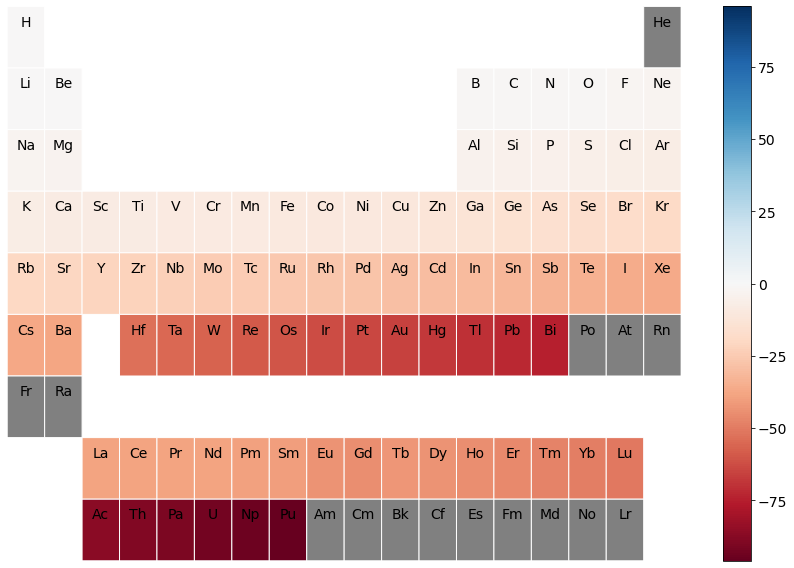

<module 'matplotlib.pyplot' from '/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [37]:
#display periodic table heatmap using energy_dict
energy_dict = dict(zip(element_data['element'].tolist(), element_data['gs_energy_diff'].tolist()))
keys = list(energy_dict.keys())
print('Elements ({0}):'.format(len(keys)), keys)
maxval = max([abs(e) for e in energy_dict.values()]) #used to center color scale at 0
periodic_table_heatmap(energy_dict, show_plot=True, cmap='RdBu', cmap_range=(-maxval, maxval))

In [7]:
missing_from_scan

['He']

In [38]:
element_data

,element,SCAN_gs,GGA_gs,SCAN_entries,GGA_entries,matching_gs,gs_energy_diff
0,Ac,ComputedStructureEntry 2758 - Ac3\nEnergy = -2...,ComputedStructureEntry mp-1183069 - Ac3\nEnerg...,[ComputedStructureEntry 2758 - Ac3\nEnergy = -...,[ComputedStructureEntry mp-10018 - Ac1\nEnergy...,True,-86.380146
1,Ag,ComputedStructureEntry 6558 - Ag1\nEnergy = -3...,ComputedStructureEntry mp-124 - Ag1\nEnergy = ...,[ComputedStructureEntry 6558 - Ag1\nEnergy = -...,[ComputedStructureEntry mp-10597 - Ag2\nEnergy...,True,-28.533227
2,Al,ComputedStructureEntry 6676 - Al4\nEnergy = -3...,ComputedStructureEntry mp-134 - Al1\nEnergy = ...,[ComputedStructureEntry 6676 - Al4\nEnergy = -...,[ComputedStructureEntry mp-1183144 - Al4\nEner...,False,-3.996033
3,Ar,ComputedStructureEntry 4460 - Ar2\nEnergy = -1...,ComputedStructureEntry mp-23155 - Ar1\nEnergy ...,[ComputedStructureEntry 4460 - Ar2\nEnergy = -...,[ComputedStructureEntry mp-23155 - Ar1\nEnergy...,False,-6.869398
4,As,ComputedStructureEntry 4901 - As4\nEnergy = -8...,ComputedStructureEntry mp-11 - As2\nEnergy = -...,[ComputedStructureEntry 4901 - As4\nEnergy = -...,[ComputedStructureEntry mp-10 - As2\nEnergy = ...,False,-15.542546
...,...,...,...,...,...,...,...
83,Xe,ComputedStructureEntry 6784 - Xe4\nEnergy = -1...,ComputedStructureEntry mp-972256 - Xe1\nEnergy...,[ComputedStructureEntry 6784 - Xe4\nEnergy = -...,[ComputedStructureEntry mp-1187761 - Xe4\nEner...,False,-36.220109
84,Y,ComputedStructureEntry 2640 - Y2\nEnergy = -55...,ComputedStructureEntry mp-112 - Y2\nEnergy = -...,[ComputedStructureEntry 2640 - Y2\nEnergy = -5...,[ComputedStructureEntry mp-112 - Y2\nEnergy = ...,True,-21.396766
85,Yb,ComputedStructureEntry 6593 - Yb1\nEnergy = -5...,ComputedStructureEntry mp-162 - Yb1\nEnergy = ...,[ComputedStructureEntry 6593 - Yb1\nEnergy = -...,[ComputedStructureEntry mp-1187875 - Yb4\nEner...,False,-48.995631
86,Zn,ComputedStructureEntry 4056 - Zn2\nEnergy = -2...,ComputedStructureEntry mp-79 - Zn2\nEnergy = -...,[ComputedStructureEntry 4056 - Zn2\nEnergy = -...,[ComputedStructureEntry mp-1187812 - Zn3\nEner...,True,-12.257687


In [ ]:
for i in range(len(element_data)):
    scan_gs, gga_gs = element_data.iloc[i, 1], element_data.iloc[i, 2]

In [8]:
#Find unstable GGA polymorph that is SCAN ground state, and vice-versa
#gs_energy_diff (dictionary) --> contains the calculation as specified by email
#problematic_elements --> ones that are giving a bit of trouble

# gs_energy_diff = dict()
# problematic_elements = list()

# for elem in scan_gs_dict.keys():
#     scan_gs = scan_gs_dict[elem]
#     gga_gs = gga_gs_dict[elem]
    
#     matching_in_gga = None
#     matching_in_scan = None
    
#     for entry in gga_sorted[elem]:
#         if matcher.fit(scan_gs.structure, entry.structure):
#             matching_in_gga = entry
#             break
            
#     for entry in scan_sorted[elem]:
#         if matcher.fit(gga_gs.structure, entry.structure):
#             matching_in_scan = entry
#             break
            
#     if matching_in_gga and matching_in_scan:
#         gs_energy_diff[elem] = (scan_gs.energy_per_atom - matching_in_scan.energy_per_atom) - (matching_in_gga.energy_per_atom - gga_gs.energy_per_atom)
#     else:
#         problematic_elements.append((elem, True if matching_in_gga else False, True if matching_in_scan else False))

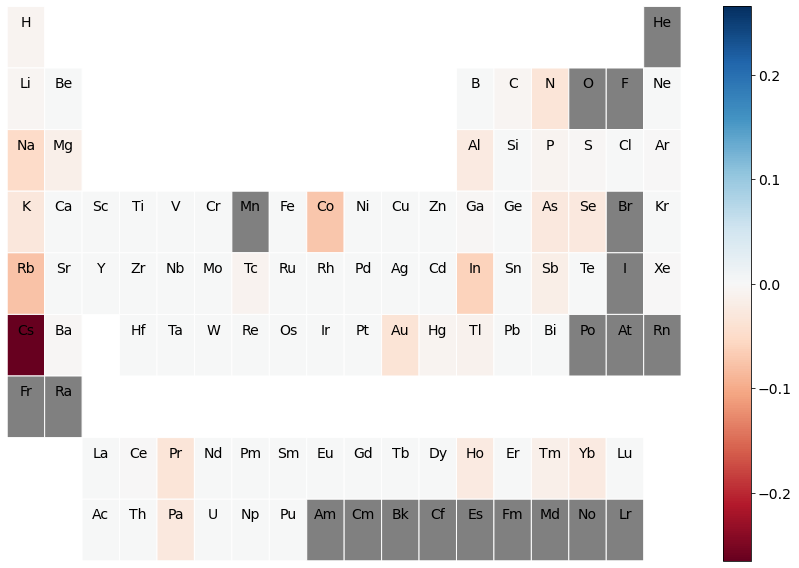

<module 'matplotlib.pyplot' from '/home/ayush/miniconda3/envs/scan/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [9]:
'''
gs_energy_diff is a dict
key = element
value:
(energy_per_atom of the SCAN ground state minus energy_per_atom of the unstable SCAN polymorph that is also the GGA ground state)
minus
(energy_per_atom of the unstable GGA polymorph that is also the SCAN ground state minus energy_per_atom of GGA ground state)

--->matching done with StructureMatcher
'''

maxval1 = max([abs(e) for e in gs_energy_diff.values()]) #used to center color scale at 0
periodic_table_heatmap(gs_energy_diff, show_plot=True, cmap='RdBu', cmap_range=(-maxval1, maxval1))

In [10]:
problematic_elements

[('Br', True, False),
 ('F', True, False),
 ('I', True, False),
 ('Mn', True, False),
 ('O', False, False)]

In [13]:
#writes ground state structures to cif files in working directory
def write_to_cif(elem, scan_structs, gga_structs, foldername='special_cif'):
    i = 0
    for struct in scan_structs:
        struct.to(fmt=".cif", filename='{0}/{1}/scan/{2}_{3}_scan.cif'.format(foldername, elem, struct.composition.reduced_formula, i))
        i += 1
    i = 0
    for struct in gga_structs:
        struct.to(fmt=".cif", filename='{0}/{1}/gga/{2}_{3}_gga.cif'.format(foldername, elem, struct.composition.reduced_formula, i))
        i += 1

In [24]:
def write_element(elem):
    fs, fg = sorted(scan_sorted[elem], key=lambda x: x.energy_per_atom), sorted(gga_sorted[elem], key=lambda x: x.energy_per_atom)
    write_to_cif(elem, [e.structure for e in fs], [e.structure for e in fg], 'special_cif')
    print(elem, 'SCAN', fs[0].structure.get_space_group_info())
    print(elem, 'GGA', fg[0].structure.get_space_group_info())
    print(matcher.fit(fs[0].structure, fg[0].structure))

In [25]:
write_element('Br')
write_element('F')
write_element('I')
write_element('Mn')
write_element('O')

Br SCAN ('Cmce', 64)
Br GGA ('Cmce', 64)
True
F SCAN ('C2/c', 15)
F GGA ('Cmce', 64)
False
I SCAN ('Cmce', 64)
I GGA ('Cmce', 64)
True
Mn SCAN ('Im-3m', 229)
Mn GGA ('I-43m', 217)
False
O SCAN ('C2/m', 12)
O GGA ('C2/m', 12)
False
